# **Trabalho da Disciplina de Programação em R da Pós Graduação de Ciência de Dados da Unicarioca**

**Silvio Cesar de Santana    Matr.: 2017103163**

**Prof: Sergio Assuncao Monteiro, DSc**


# **Início**

**Instalando e Utilizando Bibliotecas**

In [ ]:
install.packages (c("quantmod","TTR"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("quantmod")
library("TTR")

**Selecionando Ativo para baixar dados**

In [ ]:
 ativo <- "BBDC4.SA" #(BRADESCO PN N1)
# Definindo o período desejado
inicio <- "2019-01-01"
final <- as.character(Sys.Date())  # Data atual
getSymbols(ativo, src = "yahoo", from=inicio,to=final)

[1] "BBDC4.SA"

In [ ]:
# Exibindo o dataframe dos preços ajustados
bradesco <- na.omit(Ad(get(ativo)))
head(bradesco)

           BBDC4.SA.Adjusted
2019-01-02          19.65014
2019-01-03          19.84919
2019-01-04          19.69345
2019-01-07          19.92708
2019-01-08          20.04876
2019-01-09          20.39435

In [ ]:
# Verificando a estrutura dos dados baixados
str(BBDC4.SA)

# Extraindo os preços ajustados
precos_ajustados <- Cl(BBDC4.SA)

An xts object on 2019-01-02 / 2024-05-10 containing: 
  Data:    double [1331, 6]
  Columns: BBDC4.SA.Open, BBDC4.SA.High, BBDC4.SA.Low, BBDC4.SA.Close, BBDC4.SA.Volume ... with 1 more column
  Index:   Date [1331] (TZ: "UTC")
  xts Attributes:
    $ src    : chr "yahoo"
    $ updated: POSIXct[1:1], format: "2024-05-11 11:57:25"


# **Visualizações**

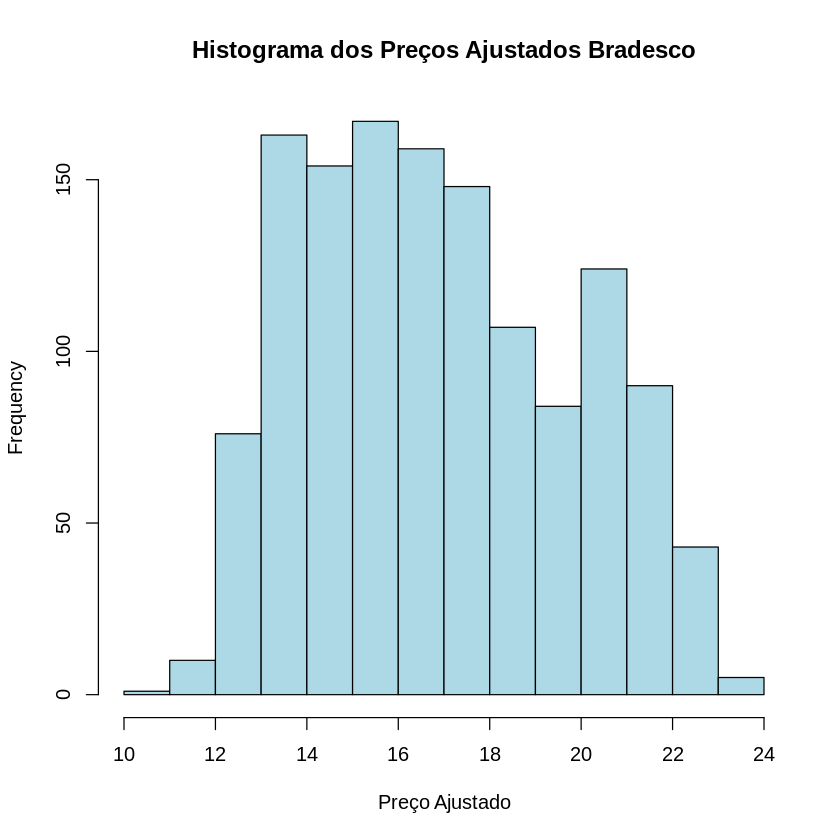

In [ ]:
# Criando o histograma dos preços ajustados
hist(bradesco, main = "Histograma dos Preços Ajustados Bradesco", xlab = "Preço Ajustado", col = "lightblue")

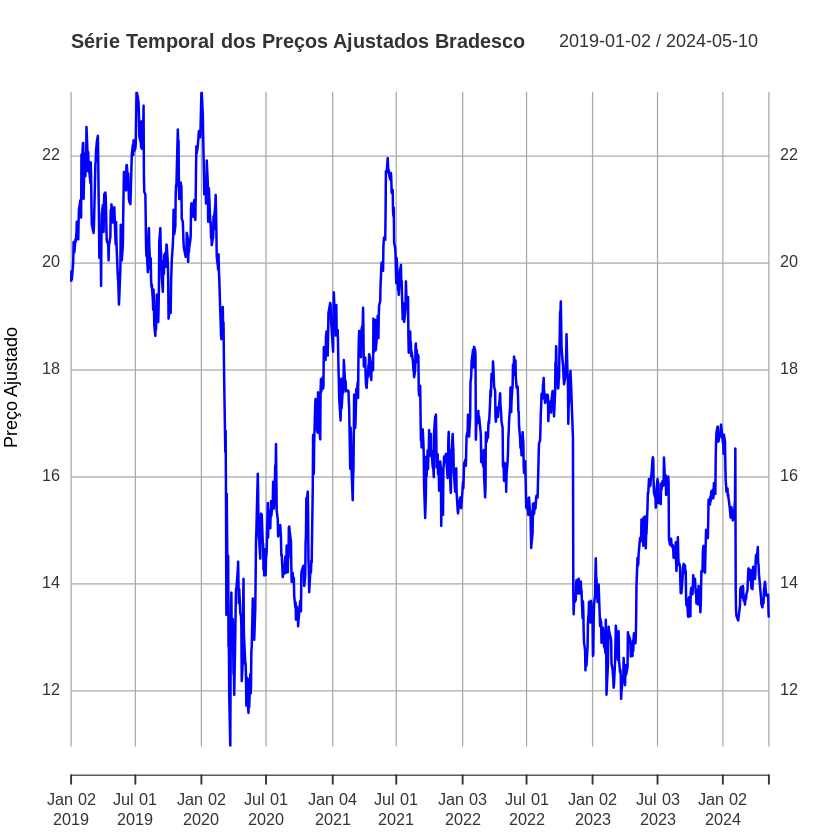

In [ ]:
# Criando a série temporal dos preços ajustados
plot(bradesco, main = "Série Temporal dos Preços Ajustados Bradesco", ylab = "Preço Ajustado", col = "blue")

**Visualização Gráfico de linha**

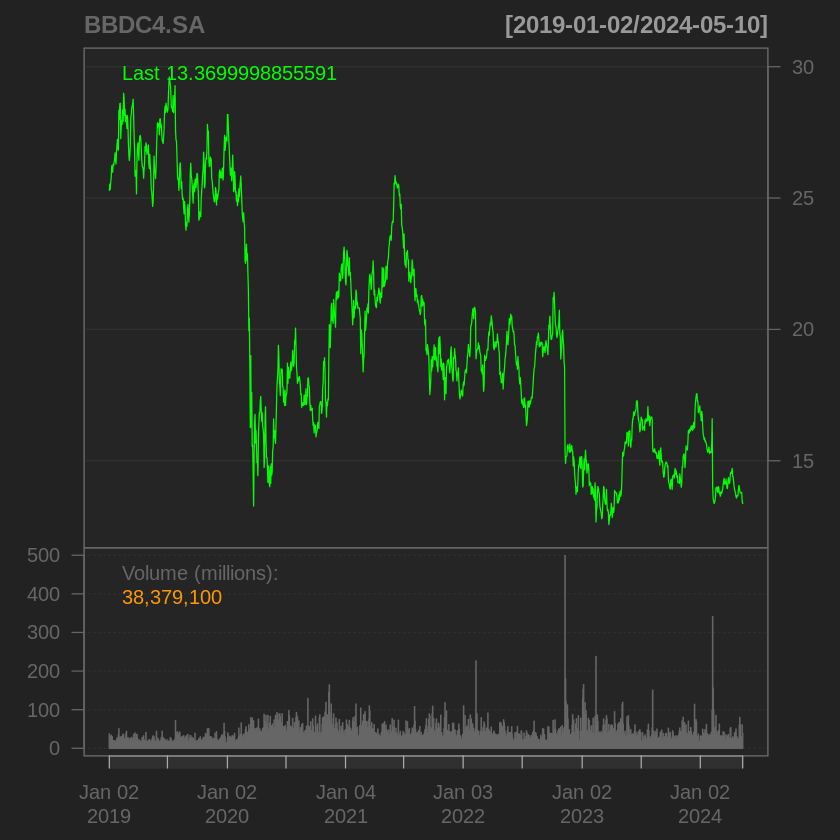

In [ ]:
chartSeries(BBDC4.SA,
            type="line",
            theme=chartTheme('black'))

**Visualização gráfico Candlesticks**

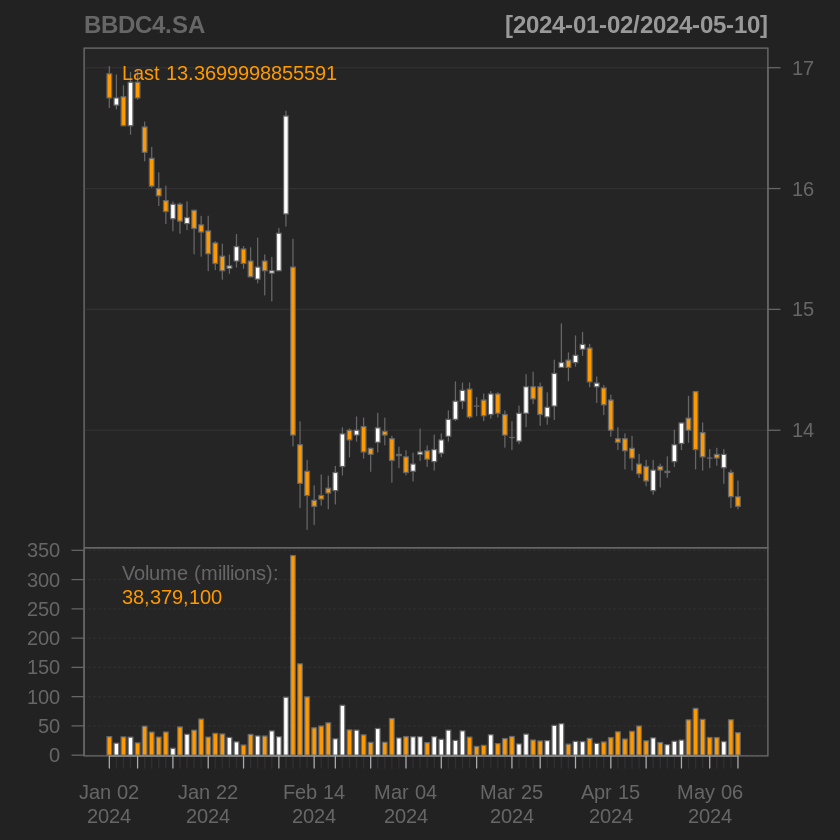

In [ ]:
chartSeries(BBDC4.SA,
            type="candlesticks",
            subset='2024-01::2024-05',,
            up.col = 'white',
            down.col = 'yellow',
            theme=chartTheme('black'))

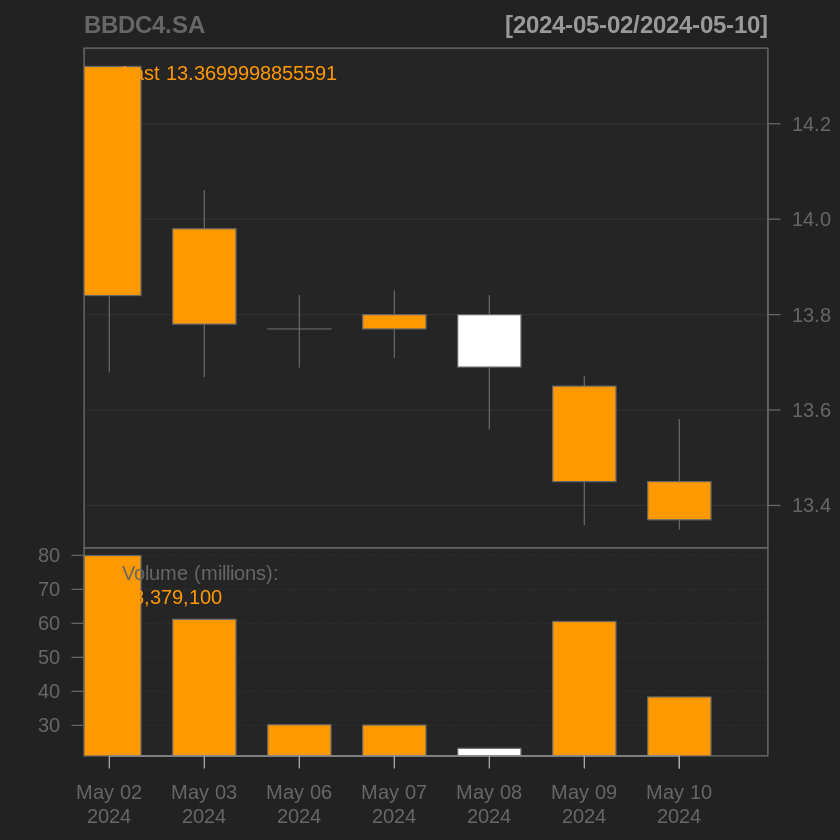

In [ ]:
chartSeries(BBDC4.SA,
            type="candlesticks",
            subset='2024-05-01::2024-05-10',,
            up.col = 'white',
            down.col = 'yellow',
            theme=chartTheme('black'))

**Visualização Período Abril/2024**

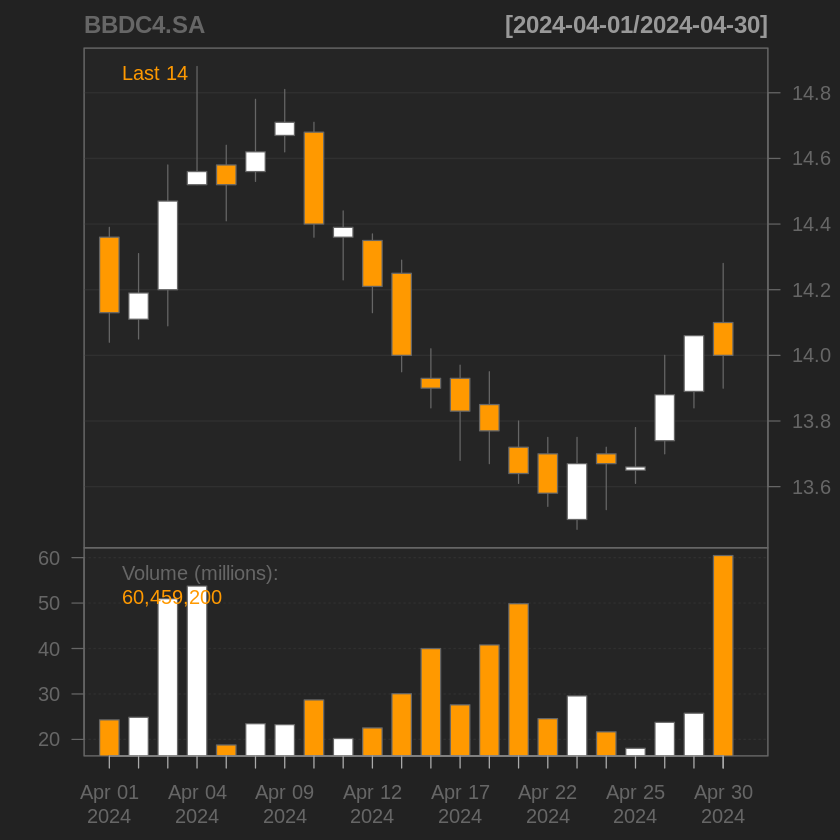

In [ ]:
chartSeries(BBDC4.SA,
            type="candlesticks",
            subset='2024-04',
            up.col = 'white',
            down.col = 'yellow',
            theme=chartTheme('black'))

# **Indicadores Técnicos**

**Média Móvel Simples (SMA)**

In [ ]:
# Cálculo médias móveis( 20 e 50 dias)
sma20 <-SMA(precos_ajustados,n=20)
sma50 <-SMA(precos_ajustados,n=50)

É a média aritmética dos preços dos últimos n dias

Sinal de negociação

```
O sinal de compra surge quando um SMA de curto prazo cruza de baixo para cima um SMA de longo prazo.
O sinal de venda surge quando um SMA de curto prazo cruza de cima para cima um SMA de longo prazo.
```

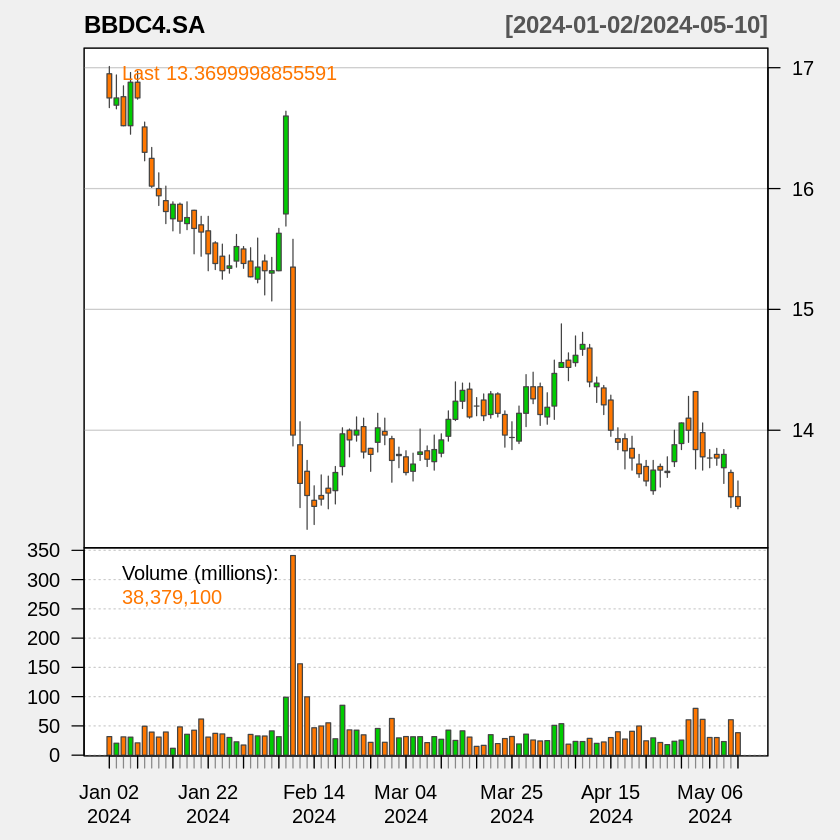

In [ ]:
# Gráfico período de Janeiro/24 a Maio/2024
chartSeries(BBDC4.SA,
            subset='2024-01::2024-05',
            theme=chartTheme('white'))

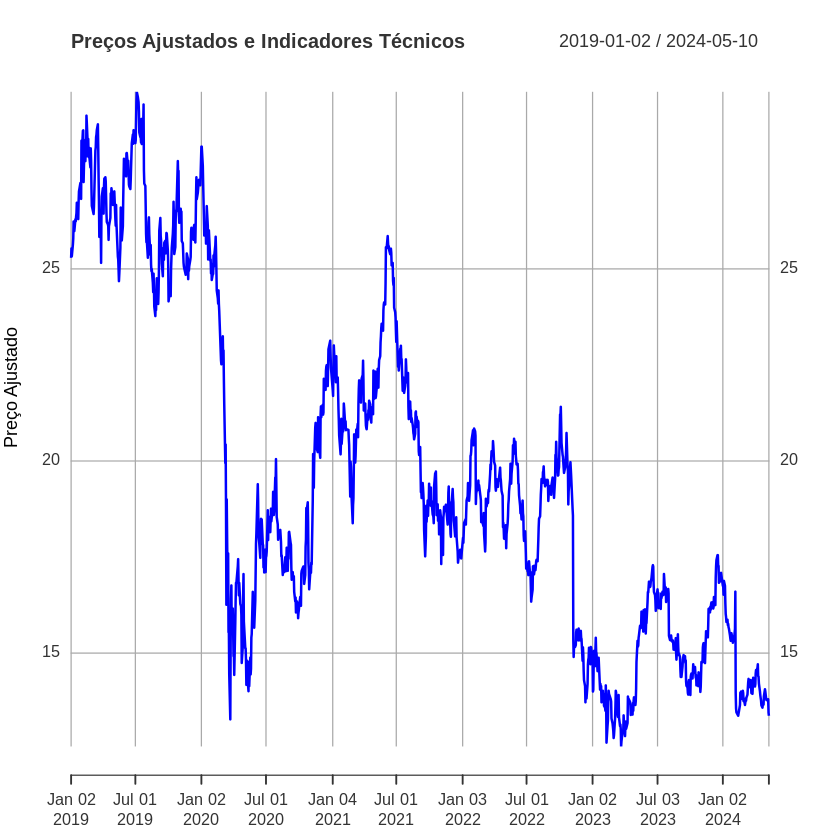

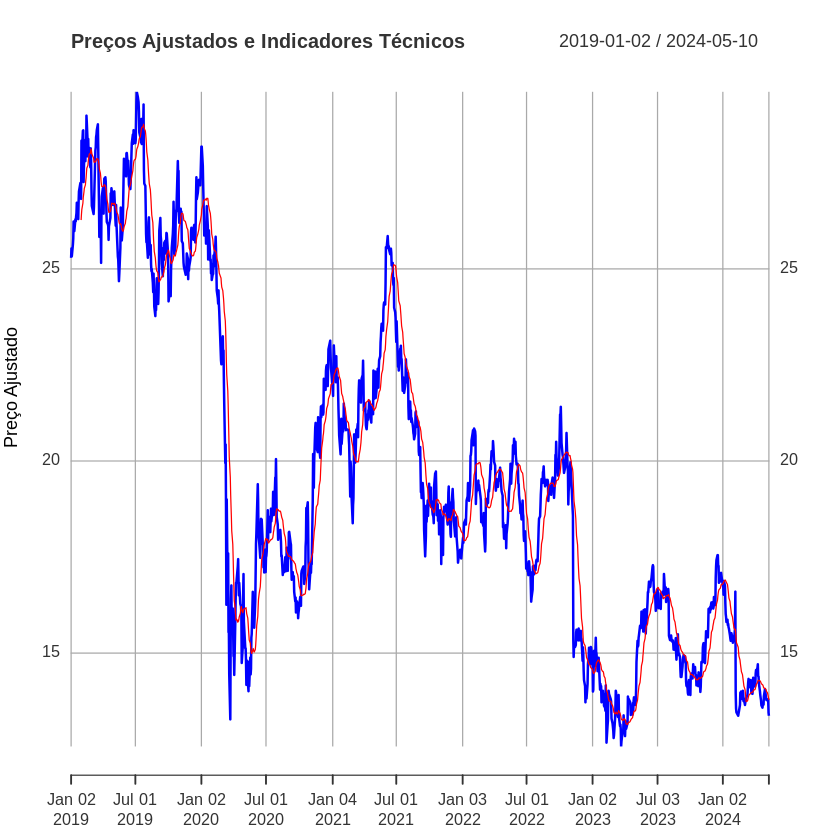

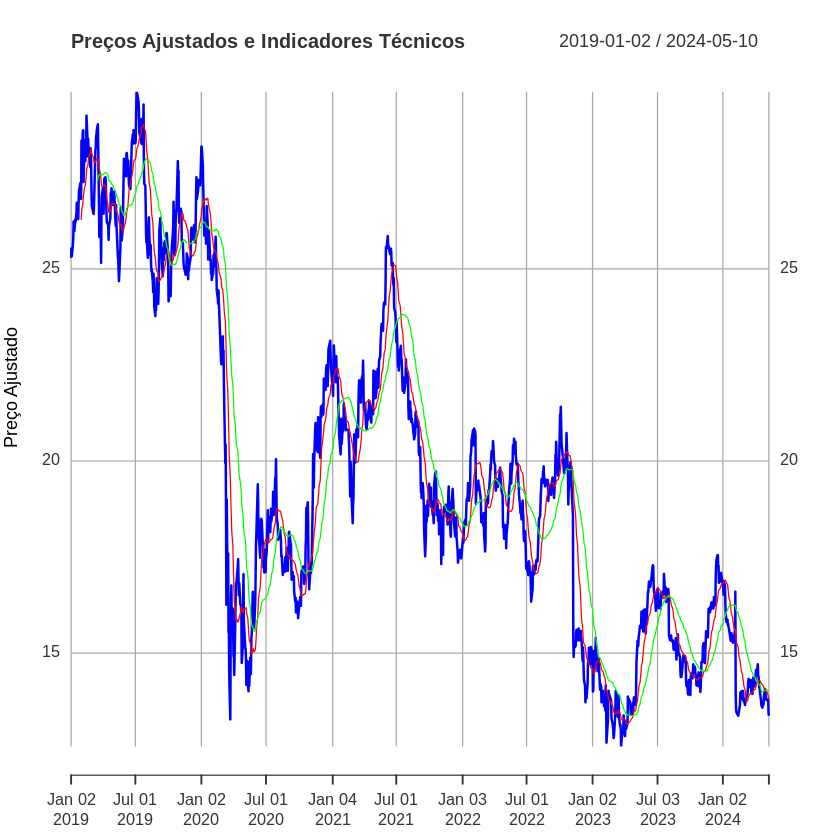

In [ ]:
# Plotando os preços ajustados com médias móveis e envelopes de Bollinger
plot(precos_ajustados, type = "l", col = "blue", main = "Preços Ajustados e Indicadores Técnicos",
     ylab = "Preço Ajustado")
lines(sma20, col = "red")
lines(sma50, col = "green")

**Visualização Plataforma B3**

**Gráfico com Médias Móveis de 20 e 50 dias (2024)**
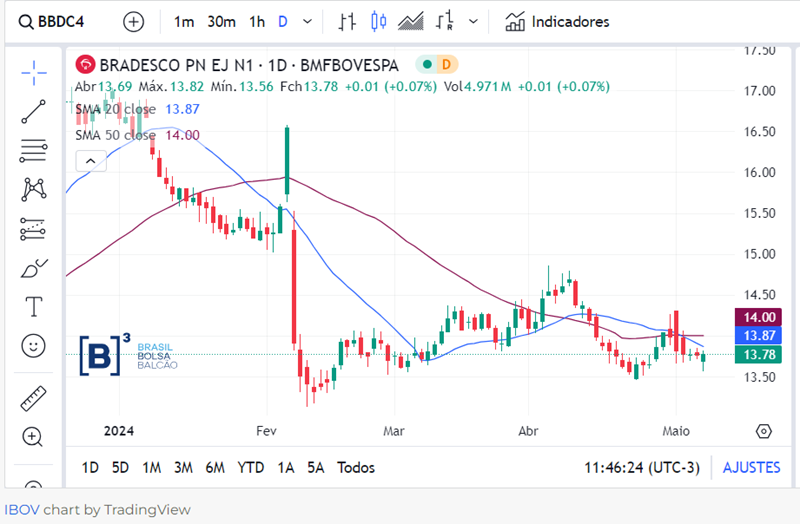

**Média móvel exponencial (EMA)**

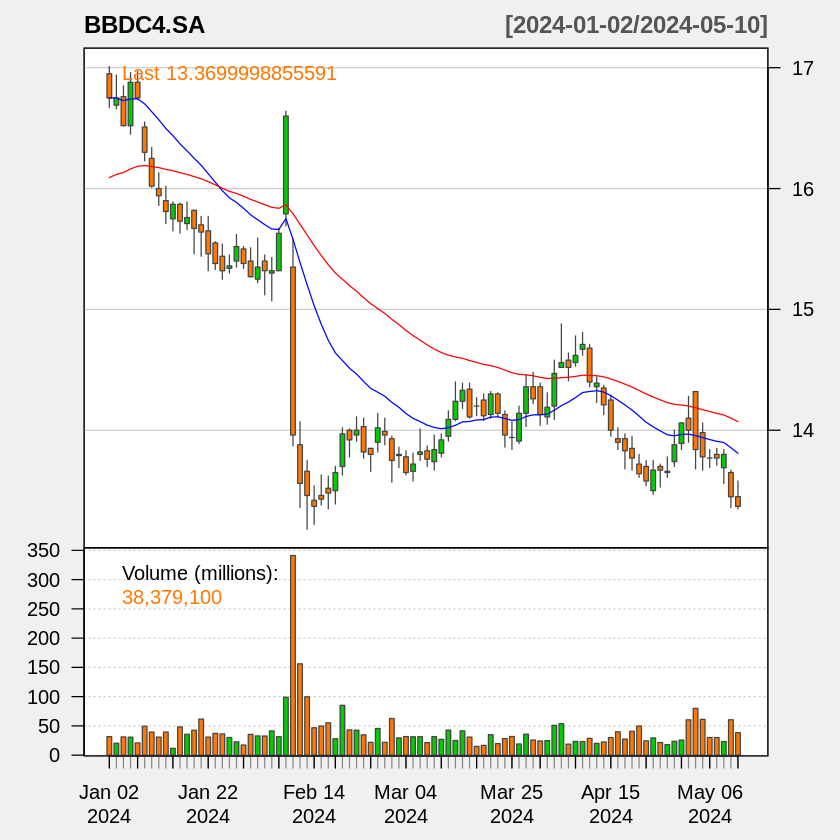

In [ ]:
# Adicionando médias exponenciais 20 e 50 dias
addEMA(n = c(20, 50), on = 1,col = c("blue", "red"))

**Visualização Plataforma B3**

**Gráfico com Médias EMA de 9 e 26 dias (2024)**

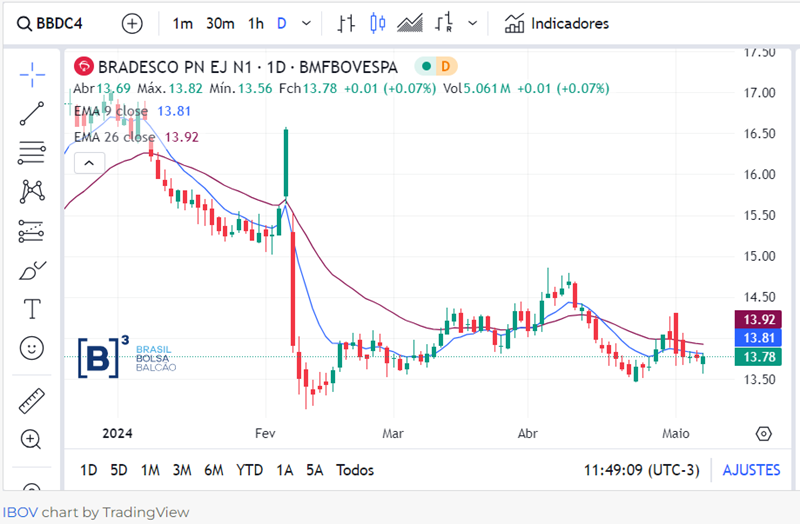

**Banda de Bollinger (BBands)**

In [ ]:
# Calculando os envelopes de Bollinger
n <- 20  # Período para os envelopes de Bollinger
BBDC4.SA$SDB <- BBands(precos_ajustados, n = n, maType = "SMA", sd = 2)$dn
BBDC4.SA$SDT <- BBands(precos_ajustados, n = n, maType = "SMA", sd = 2)$up

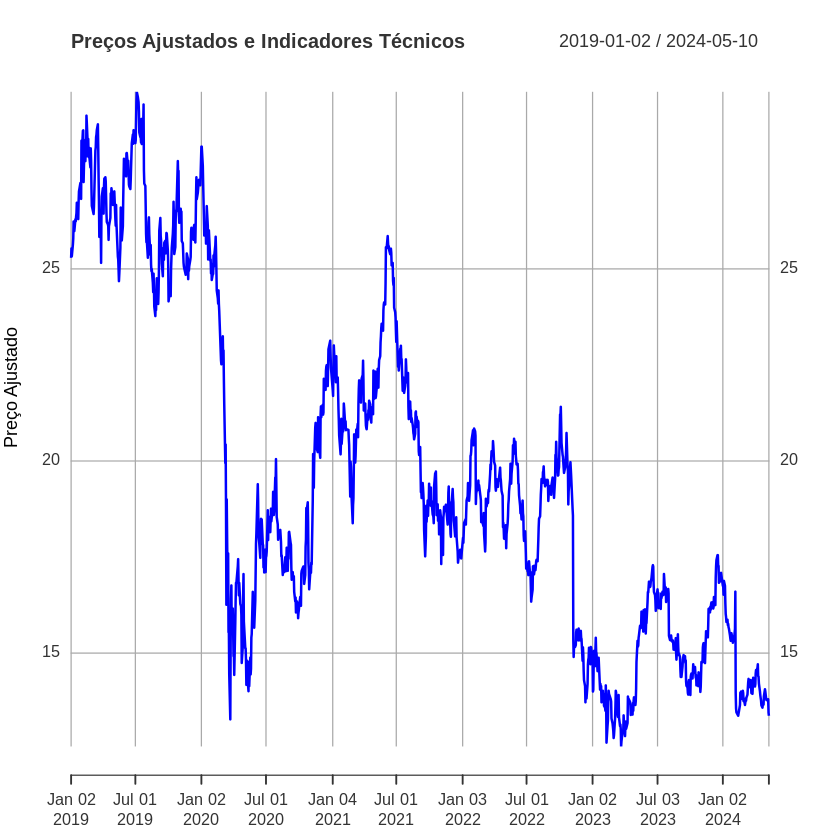

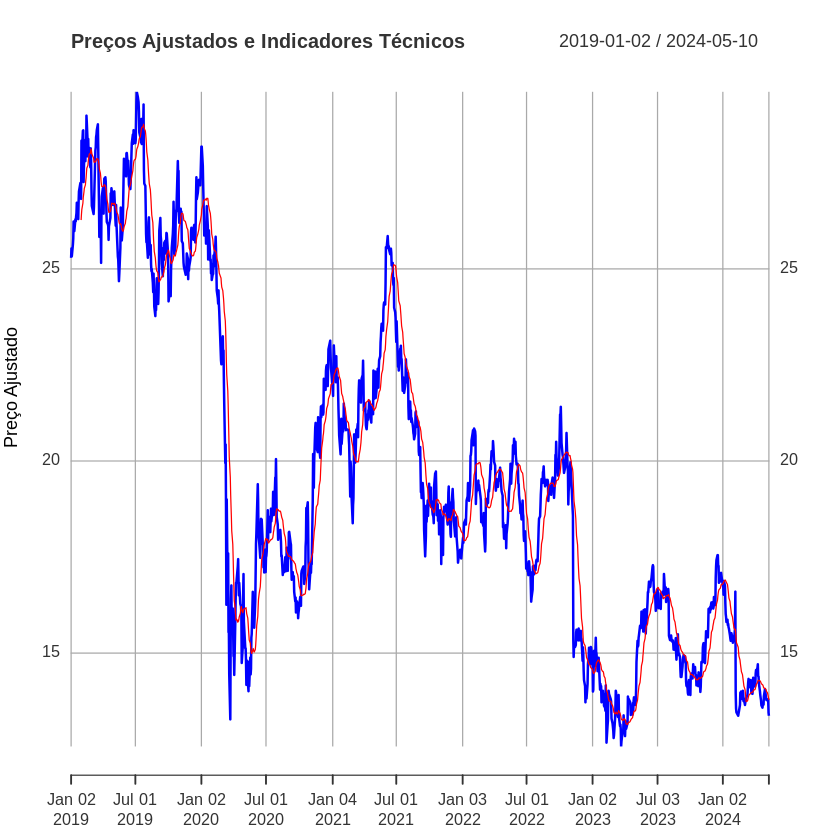

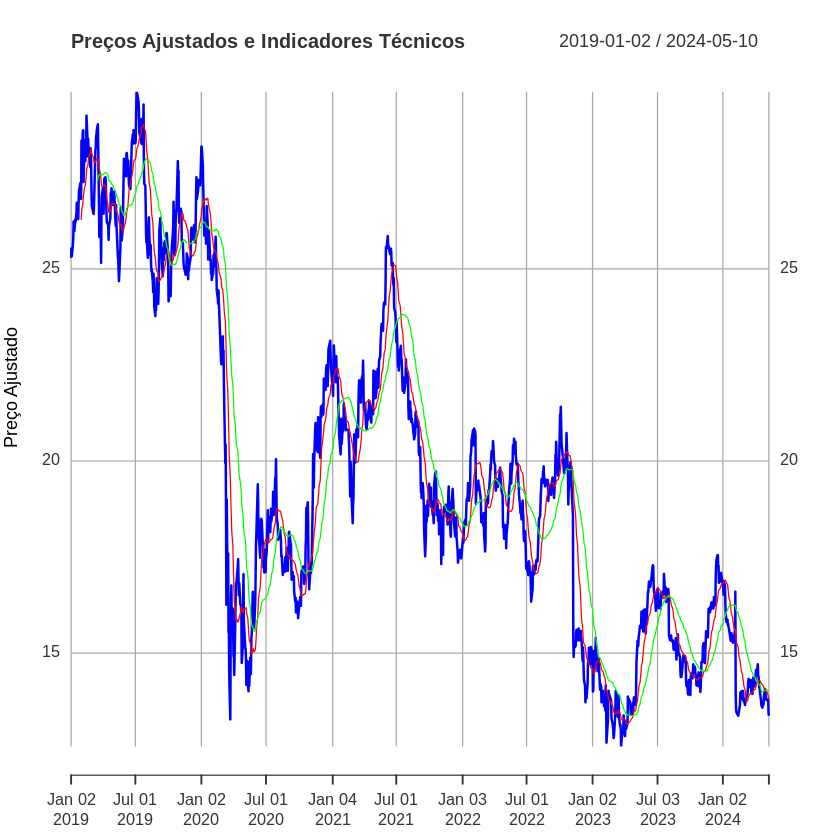

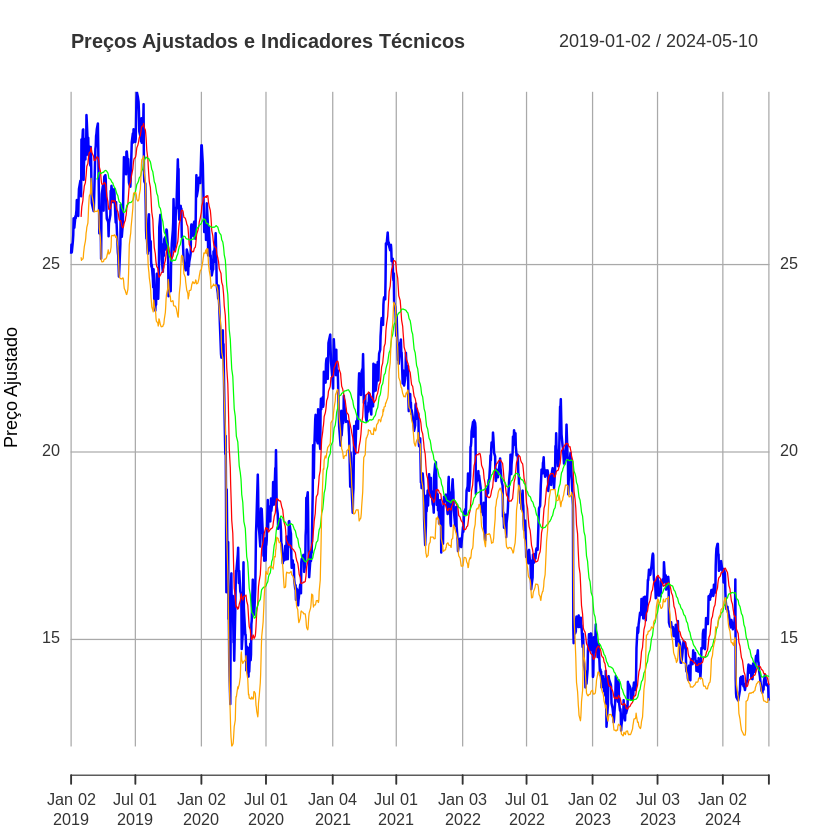

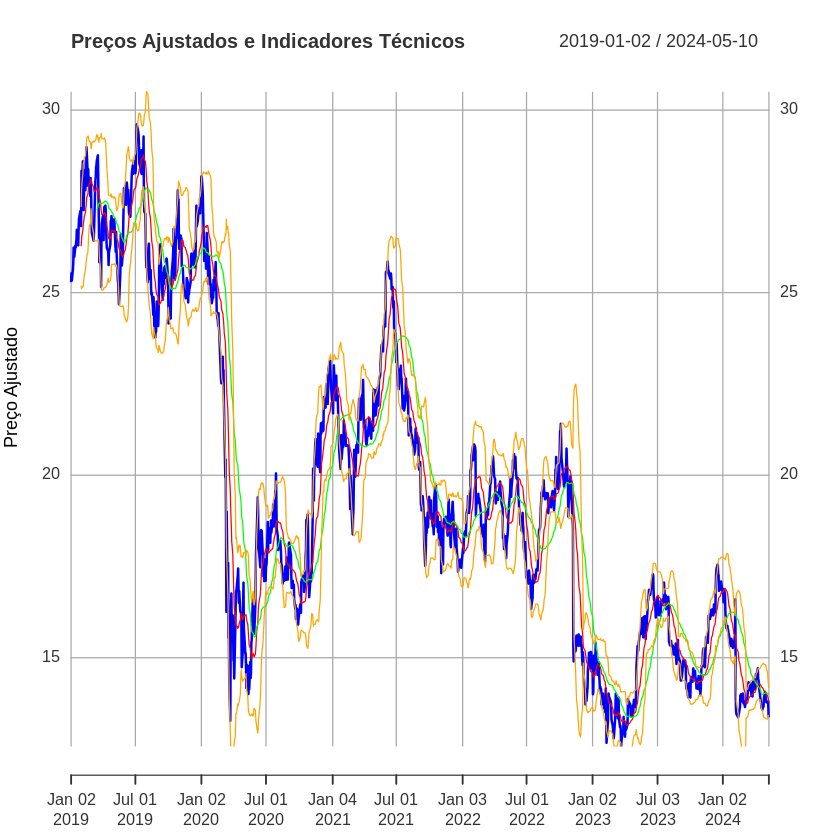

In [ ]:
# Plotando os preços ajustados com médias móveis e envelopes de Bollinger
plot(precos_ajustados, type = "l", col = "blue", main = "Preços Ajustados e Indicadores Técnicos",
     ylab = "Preço Ajustado")
lines(sma20, col = "red")
lines(sma50, col = "green")
lines(BBDC4.SA$SDB, col = "orange")
lines(BBDC4.SA$SDT, col = "orange")

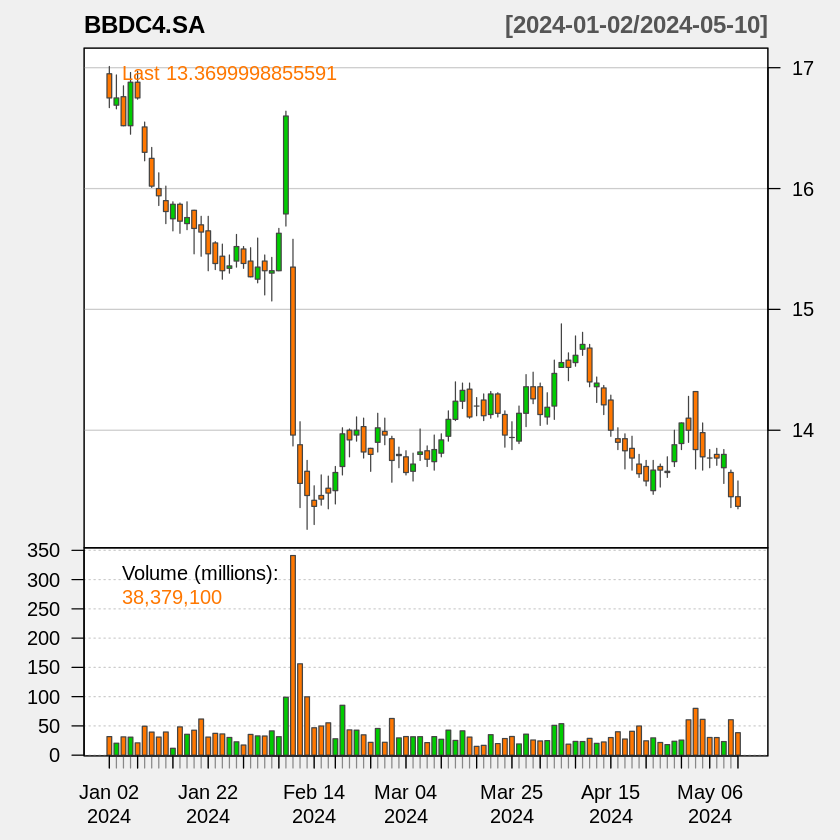

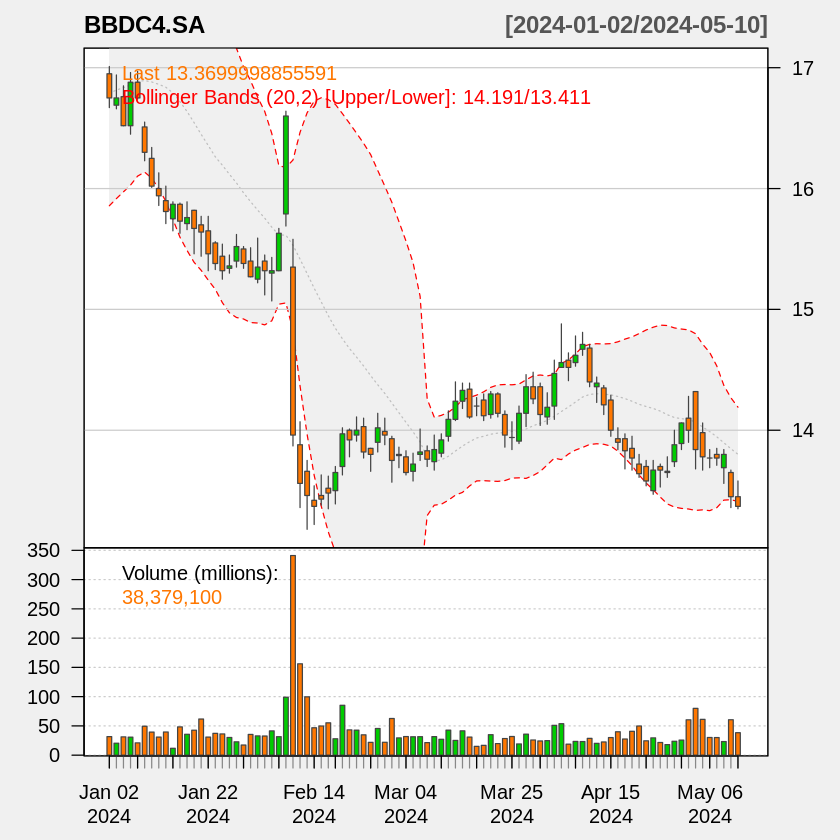

In [ ]:
chartSeries(BBDC4.SA,
            subset='2024-01::2024-05',
            theme=chartTheme('white'))
addBBands(n=20,sd=2)

**Visualização Plataforma B3**

**Gráfico com Bandas de Bollinger de 20 dias e desvio padrão 2 (2024)**

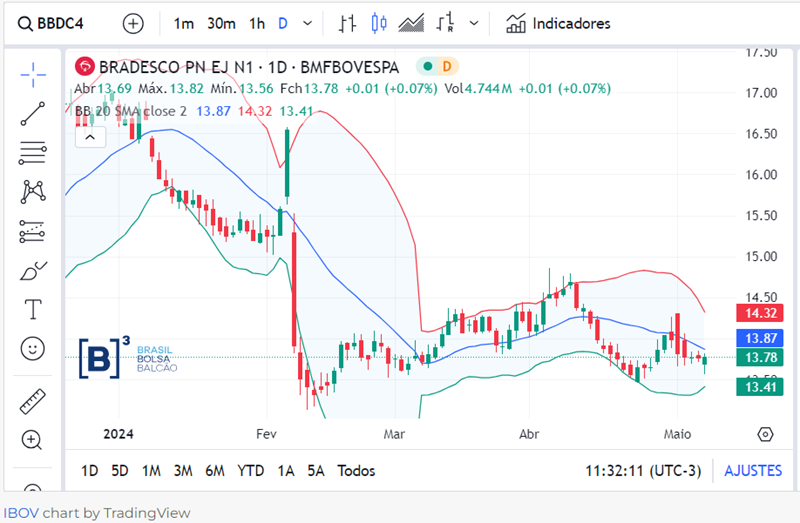

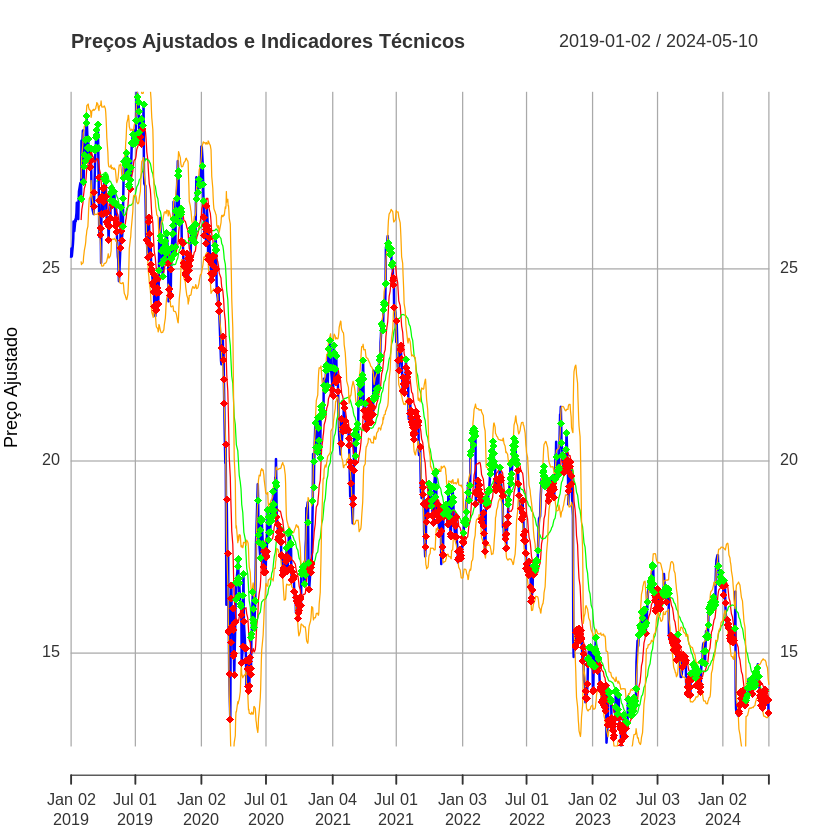

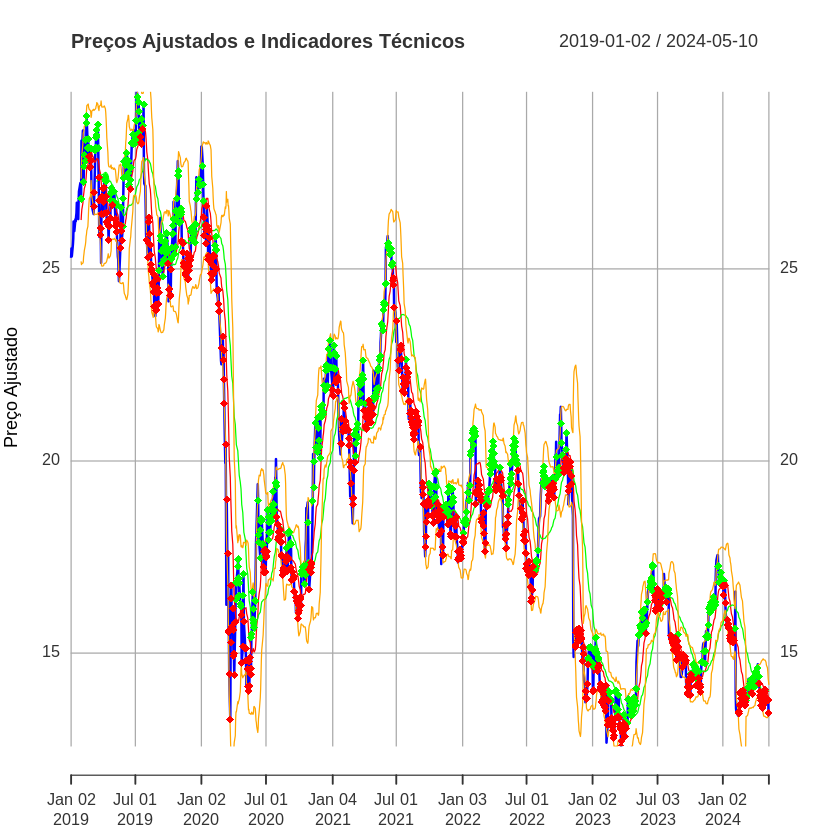

In [ ]:
# Adicionando sugestões de compra e venda
# Se o preço cruzar acima da média móvel de curto prazo e estiver abaixo do envelope superior de Bollinger, é um sinal de compra
# Se o preço cruzar abaixo da média móvel de curto prazo e estiver acima do envelope inferior de Bollinger, é um sinal de venda
signals <- rep(NA, length(precos_ajustados))
signals[precos_ajustados > sma20 & precos_ajustados < BBDC4.SA$SDT] <- 1  # Compra
signals[precos_ajustados < sma20 & precos_ajustados > BBDC4.SA$SDB] <- -1  # Venda
points(precos_ajustados[signals == 1], col = "green", pch = 18)
points(precos_ajustados[signals == -1], col = "red", pch = 18)

**Convergência/divergência da média móvel (MACD)**

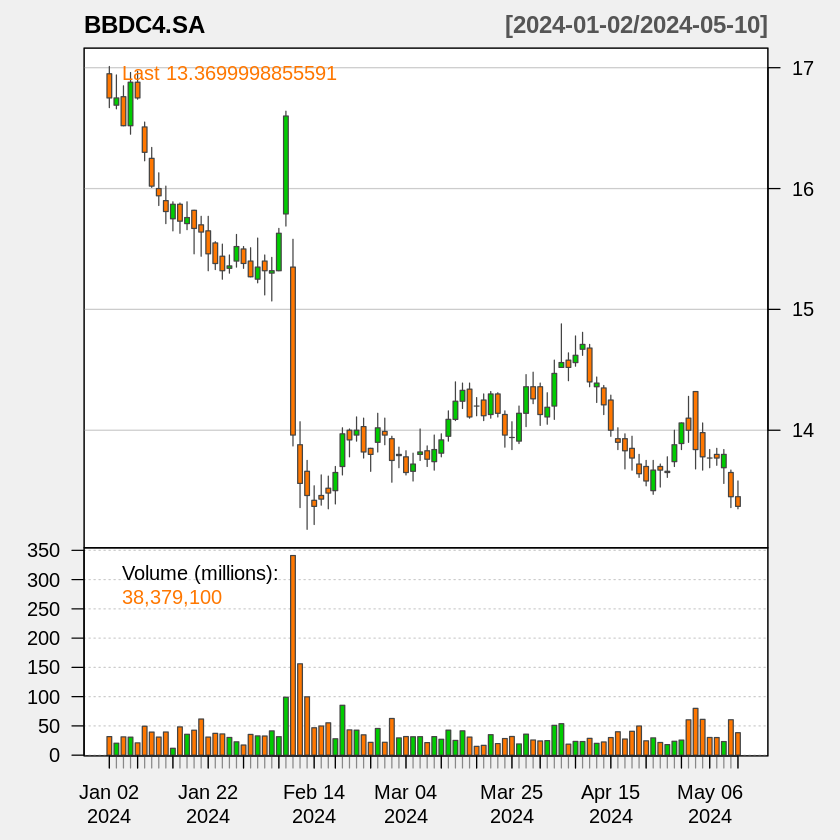

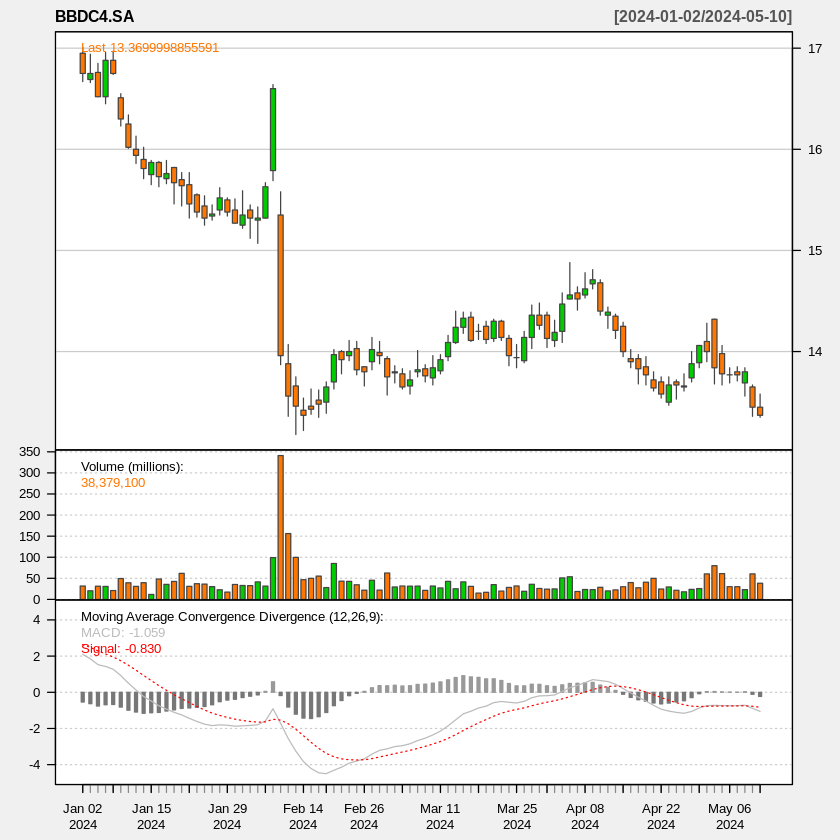

In [ ]:
chartSeries(BBDC4.SA,
            subset='2024-01::2024-05',
            theme=chartTheme('white'))
addMACD(fast=12,slow=26,signal=9,type="EMA")

**Visualização Plataforma B3**

**MACD (2024)**

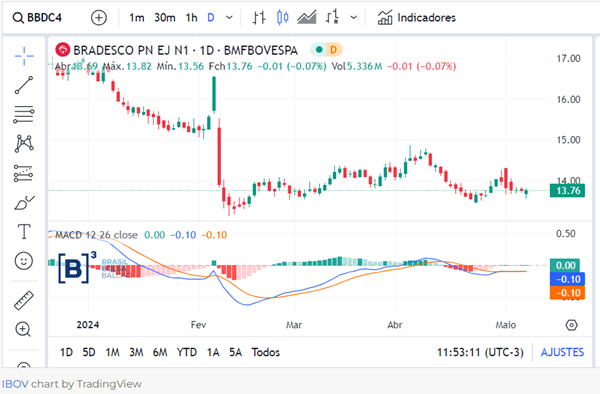

**Índice de Força Relativa (RSI)**

In [ ]:
rsi <- RSI(Cl(BBDC4.SA), SMA, n=14)
tail(rsi,n=3)

                rsi
2024-05-08 48.59814
2024-05-09 38.23528
2024-05-10 39.69465

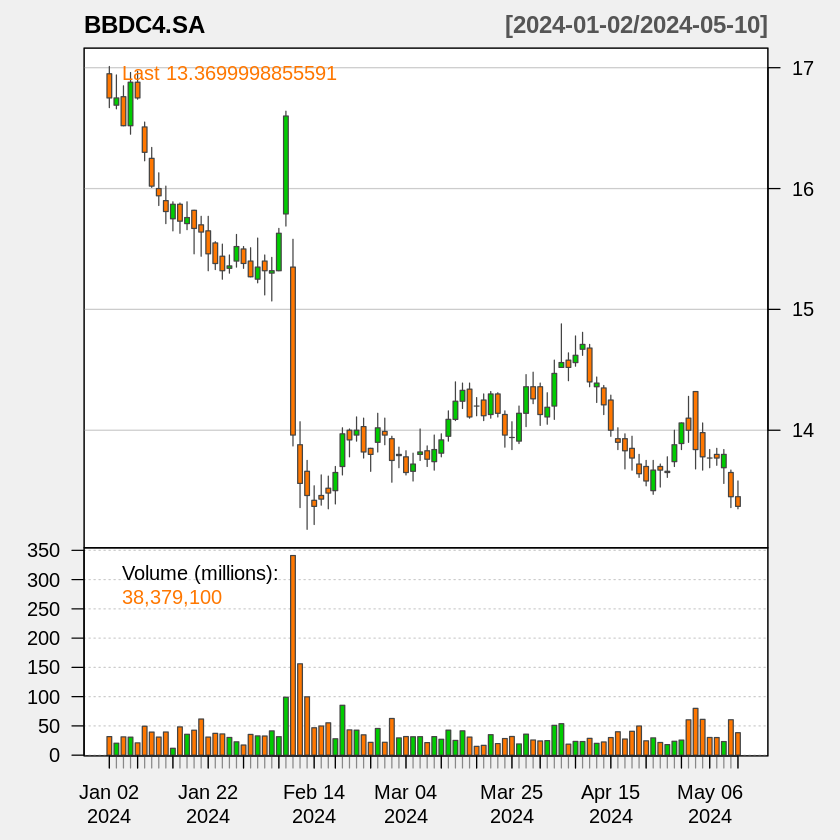

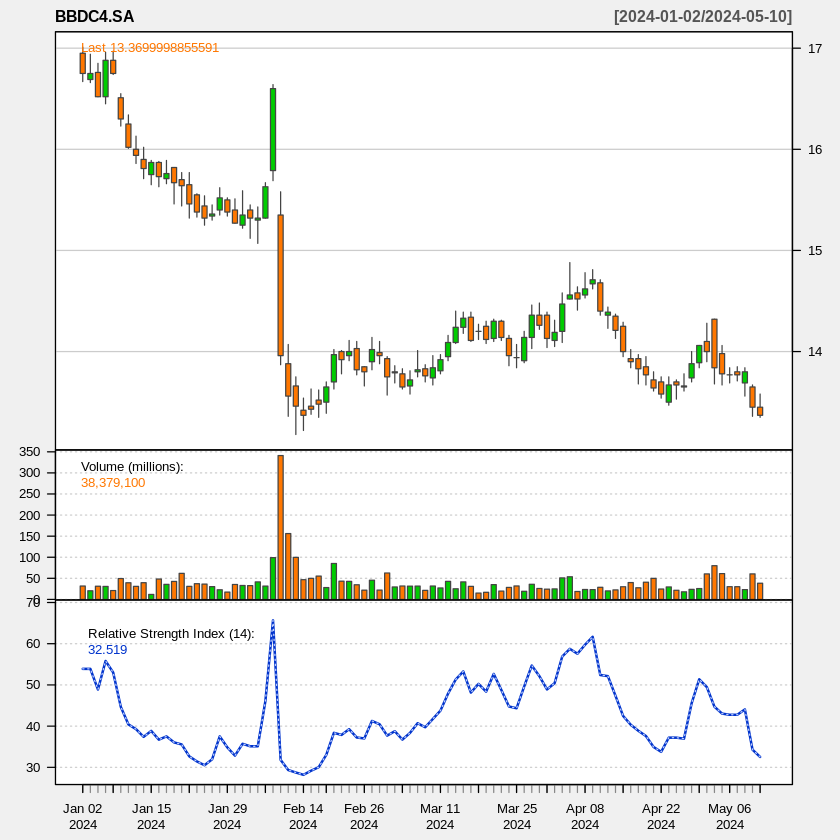

In [ ]:
chartSeries(BBDC4.SA,
            subset='2024-01::2024-05',
            theme=chartTheme('white'))
addRSI(n=14,maType="EMA")

**Visualização Plataforma B3**

**Gráfico RSI (2024)**

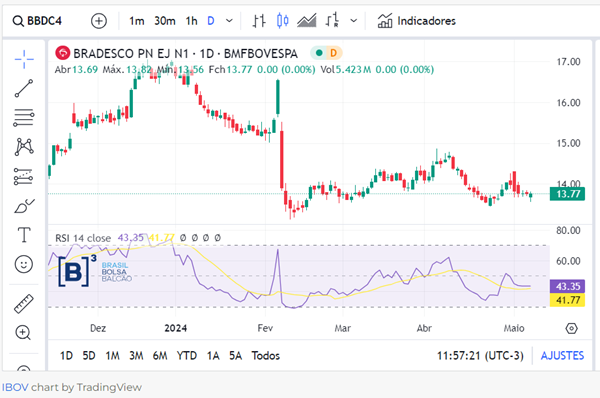

Sinal de negociação
```
O sinal de compra surge quando o ROC muda de negativo para positivo.
O sinal de venda surge quando o ROC muda de positivo para negativo.
```



**Taxa de Variação  (ROC)**

In [ ]:
roc <- ROC(Cl(BBDC4.SA),type="discrete",n=2)
tail(roc,n=20)

           BBDC4.SA.Close
2024-04-12  -0.0131944157
2024-04-15  -0.0271021775
2024-04-16  -0.0218156523
2024-04-17  -0.0121428626
2024-04-18  -0.0093524579
2024-04-19  -0.0137382199
2024-04-22  -0.0137981502
2024-04-23   0.0021993939
2024-04-24   0.0066274045
2024-04-25  -0.0007315456
2024-04-26   0.0153621095
2024-04-29   0.0292826191
2024-04-30   0.0086455248
2024-05-02  -0.0156472447
2024-05-03  -0.0157143048
2024-05-06  -0.0050577814
2024-05-07  -0.0007256368
2024-05-08   0.0021786298
2024-05-09  -0.0232389715
2024-05-10  -0.0311594420

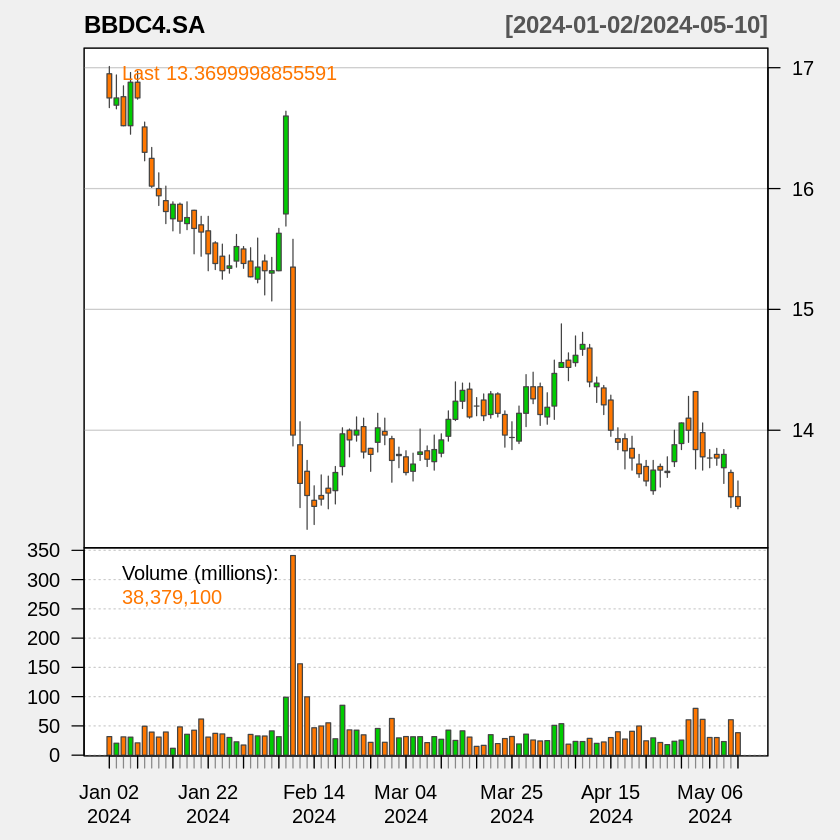

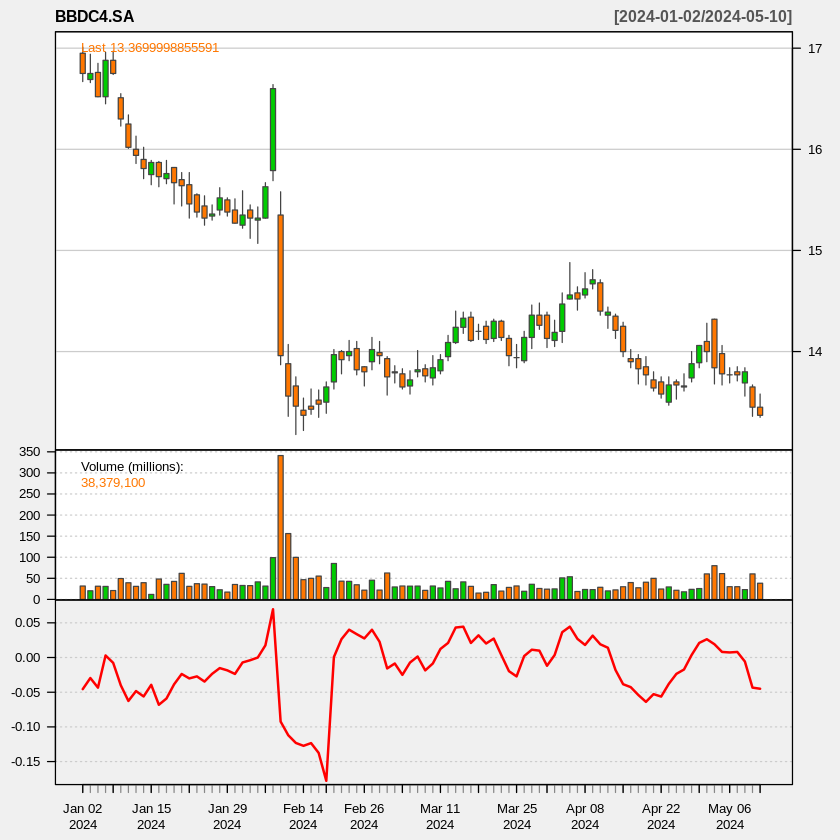

In [ ]:
chartSeries(BBDC4.SA,
            subset='2024-01::2024-005',
            theme=chartTheme('white'))
addROC(n=7)

**Visualização Plataforma B3**

**Gráfico com ROC (2024)**

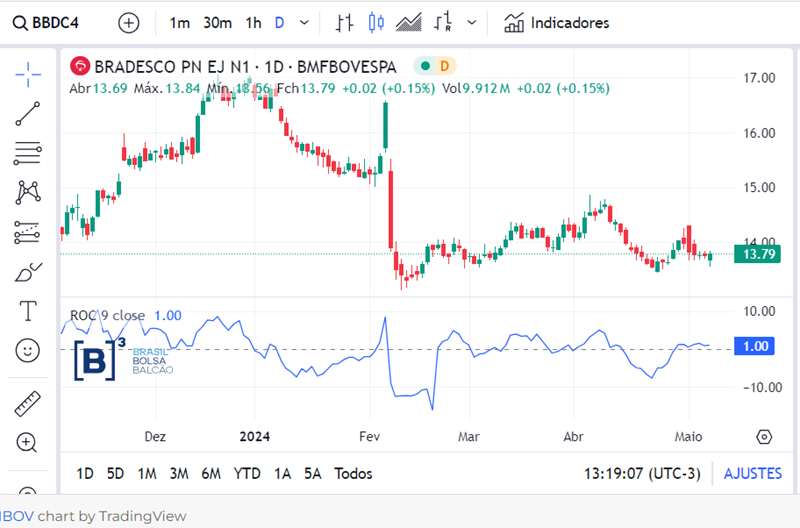

# Informações

**04/08/2023**

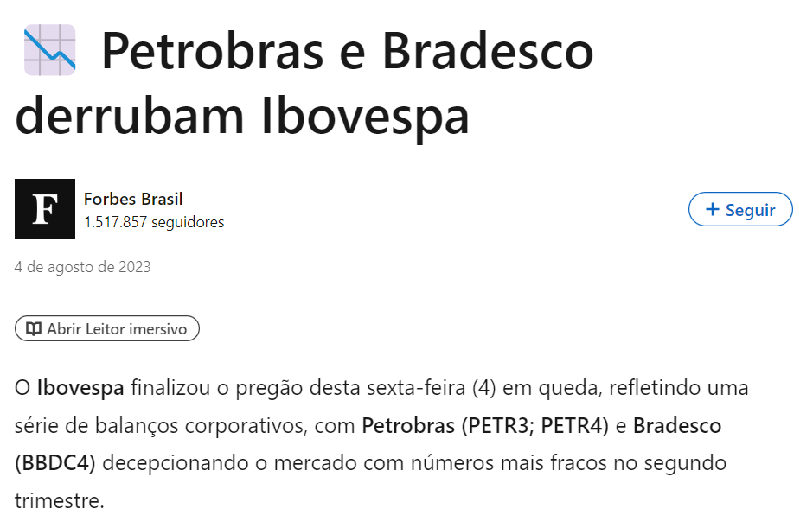

```
# O Bradesco (BBDC4) caiu 6,83% a R$15,42 após divulgar o lucro líquido
 recorrente de R$ 4,52 bilhões no segundo trimestre, uma queda de 35,8% ano
  a ano, enquanto o índice de inadimplência acima de 90 dias subiu.
O lucro líquido contábil ficou no mesmo patamar do lucro recorrente, mas
 com leve mudança na variação ano a ano, registrando queda de 36,1%.
O banco também cortou projeções de crescimento neste ano para a carteira de
 crédito expandida e para a margem financeira total.

```




**23//11/2023**

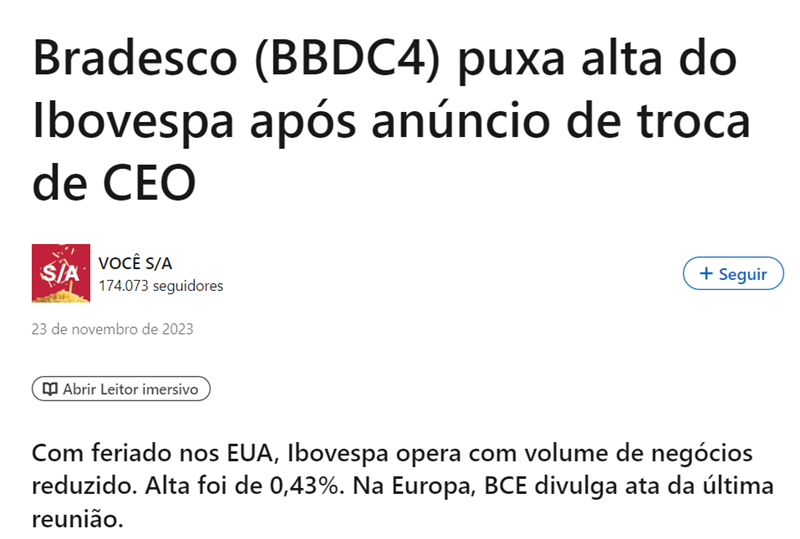



```
# Hoje, a alta foi puxada pelo Bradesco, empresa que responde a 3,7% do Ibovespa. Vejamos o que rolou:

BBDC4: +2,67%
Pela manhã, o banco anunciou uma troca inesperada de CEO. Marcelo Noronha substituirá Octavio de Lazari Júnior,
 que ocupava o cargo desde 2018. Noronha já é da casa há 20 anos
  – dos quais oito passou ocupando o posto de vice-presidente de varejo.
  Trata-se de um movimento incomum: desde sua fundação, em 1943, o Bradesco
   só teve cinco CEOs, e todos ficaram no mínimo 10 anos no cargo.
```

```
A reação do mercado a princípio foi positiva, com os ativos ordinários BBDC3 subindo 4,02%, a R$ 14,50,
enquanto BBDC4 abriu em alta de 4,13%, a R$ 16,38, às 10h08 (horário de Brasília) desta quinta-feira.
```

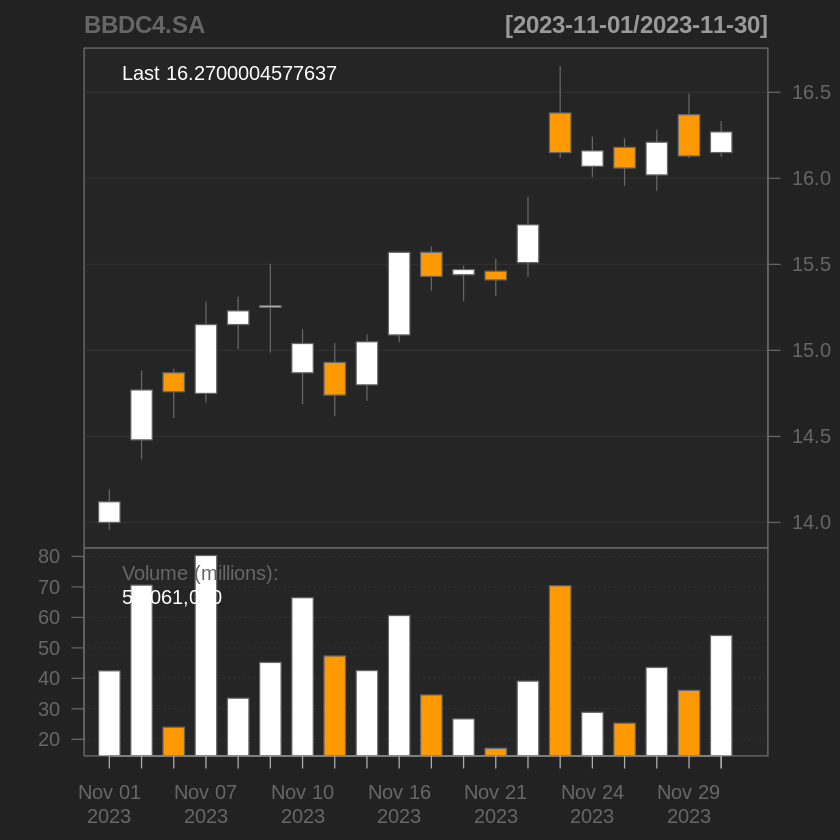

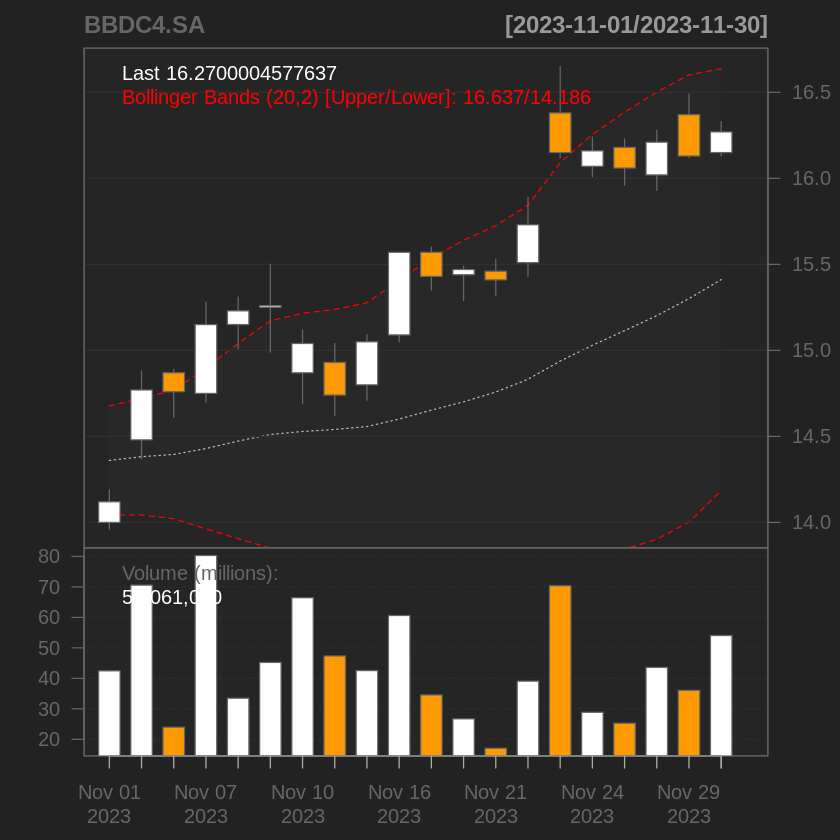

In [ ]:
chartSeries(BBDC4.SA,
            type="candlesticks",
            subset='2023-11-01::2023-11-30',,
            up.col = 'white',
            down.col = 'yellow',
            theme=chartTheme('black'))
            addBBands(n=20,sd=2)